In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/DRAGARWQ.BO.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,700.450012,715.000000,699.000000,699.450012,692.276489,2142
1,2018-01-02,710.000000,711.950012,700.000000,706.799988,699.551086,738
2,2018-01-03,702.000000,740.000000,700.000000,720.900024,713.506470,2453
3,2018-01-04,755.000000,755.000000,720.000000,730.000000,722.513123,546
4,2018-01-05,740.000000,740.000000,708.200012,721.450012,714.050842,824
...,...,...,...,...,...,...,...
1231,2022-12-26,1299.000000,1299.000000,1179.000000,1211.449951,1211.449951,747
1232,2022-12-27,1244.000000,1244.000000,1176.400024,1216.699951,1216.699951,374
1233,2022-12-28,1200.000000,1224.349976,1183.000000,1204.300049,1204.300049,183
1234,2022-12-29,1180.250000,1229.000000,1180.250000,1213.250000,1213.250000,191


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,483.358334,494.821442,468.756068,481.142800,479.037851,1361.817152
std,262.220116,270.012483,251.453978,259.414667,259.218141,2971.760044
min,174.600006,187.949997,169.199997,179.149994,178.622681,0.000000
25%,284.950012,291.712509,280.000000,285.000000,284.086342,140.000000
50%,398.000000,405.000000,392.225006,398.074997,396.604156,518.500000
75%,619.962509,635.250000,601.162506,620.000000,617.352479,1480.000000
max,1520.000000,1580.000000,1379.900024,1489.750000,1489.750000,37529.000000


In [ ]:
df.Data	= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

<ipython-input-565-9d7ec7e71958>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Data	= pd.to_datetime(df.Date)


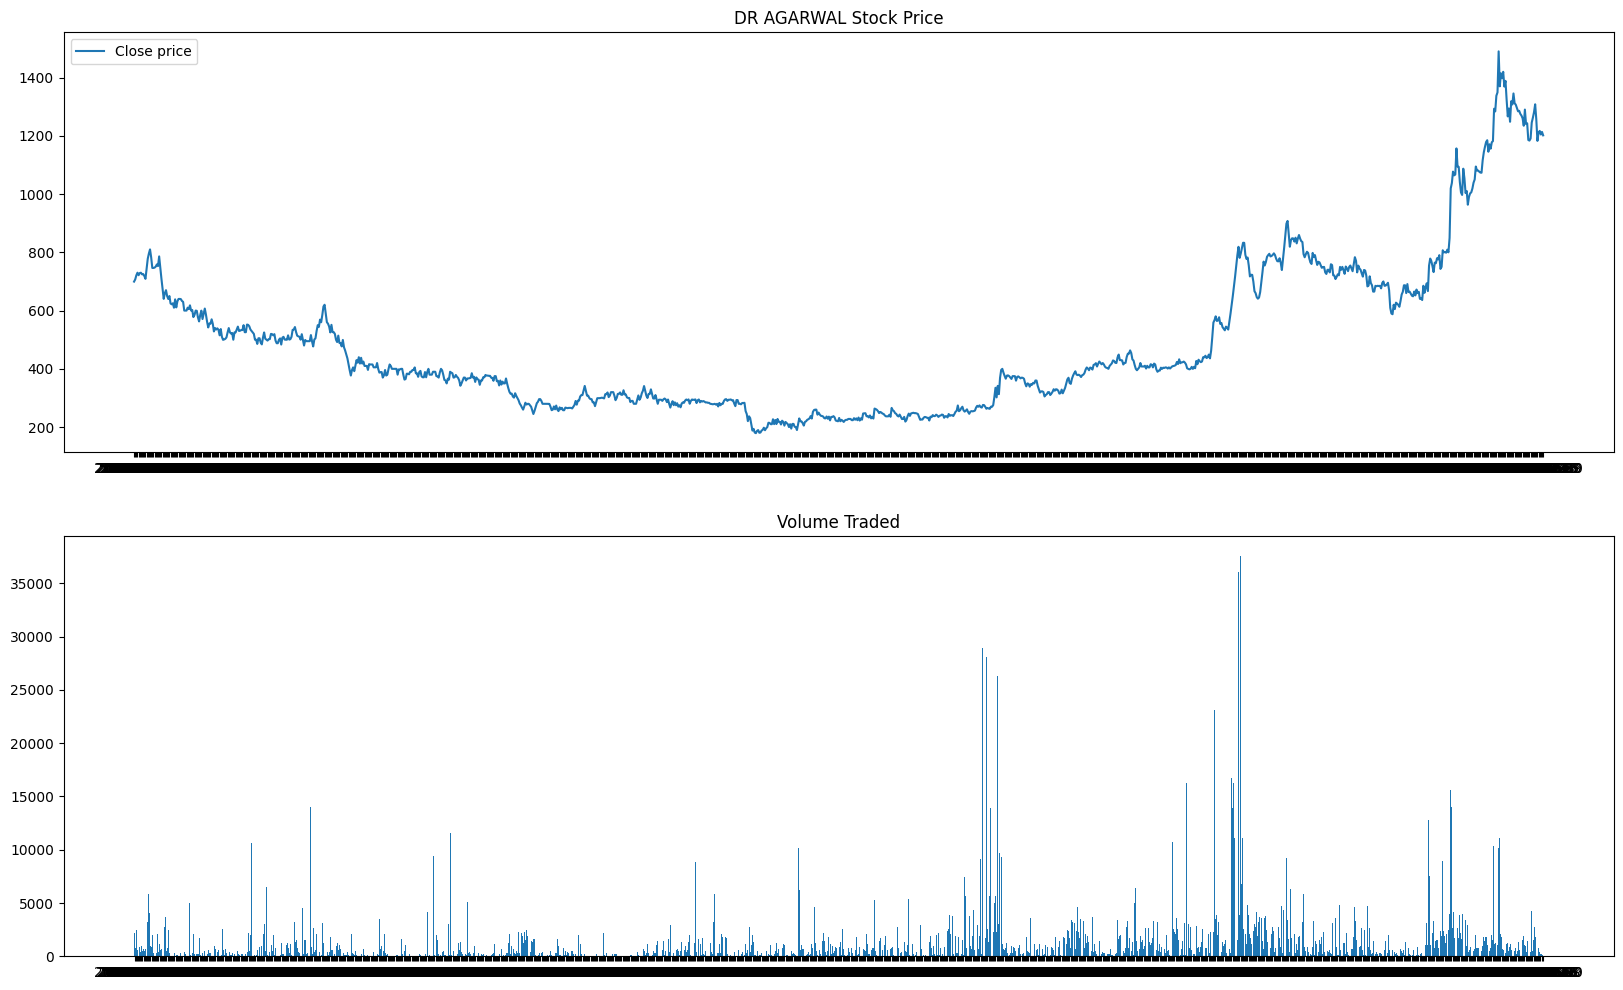

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('DR AGARWAL Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [ ]:
data = list(df2["Close"])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  0.06519564404797677
2. P-Value :  0.9636029153471399
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression: 1216
5. Critical Values :
	 1% :  -3.435739110194116
	 5% :  -2.863919777127088
	 10% :  -2.5680370312770515


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1136 100


In [ ]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.93 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11544.710, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=11040.867, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=10961.736, Time=0.55 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=10863.911, Time=0.90 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=10819.053, Time=0.72 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=10767.188, Time=0.86 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.10 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.32 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=10769.185, Time=2.55 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 10.640 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:  

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -5377.594
Date:                Fri, 31 Mar 2023   AIC                          10767.188
Time:                        10:15:55   BIC                          10797.896
Sample:                             0   HQIC                         10778.739
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8902      0.015    -60.090      0.000      -0.919      -0.861
ar.L2         -0.6325      0.025    -25.438      0.000      -0.681      -0.584
ar.L3         -0.5446      0.027    -20.508      0.000      -0.597      -0.493
ar.L4         -0.3691      0.023    -16.279      0.000      -0.414      -0.325
ar.L5         -0.2080      0.014    -14.561      0.000      -0.236      -0.180
sigma2       356.6899      5.537     64.421      0.000     345.838     367.542
===================================================================================
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):              9342.55
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               3.23   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([ 768.04557949,  801.8408582 ,  784.68612553,  764.20938314,
        737.32351431,  781.90465224,  769.47446623,  775.72113335,
        778.20205924,  793.06793653,  750.69524032,  741.58159548,
        816.37303826,  807.76261471,  800.80455106,  799.24793507,
        819.0905066 ,  812.37178239,  851.63918366, 1051.41522852,
       1087.63954302, 1110.41825292, 1110.39619008, 1108.34215743,
       1211.23984778, 1118.51677912, 1091.55856479, 1042.67997004,
        991.98924847,  990.74993682, 1069.22735608, 1058.35009352,
        979.2467224 , 1002.40336815,  962.62476724,  986.3964137 ,
        992.66021367,  993.86558153, 1021.00962644, 1041.55358591,
       1065.7112119 , 1109.39786617, 1097.98174598, 1089.12661081,
       1088.87000532, 1079.30047319, 1078.98933416, 1116.61431296,
       1156.21964427, 1173.55992894, 1194.48137501, 1202.93561489,
       1160.60108147, 1175.66006604, 1164.72314045, 1176.00757315,
       1185.89270524, 1301.30735967, 1318.16589469, 1351.81082

In [ ]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2022-08-05     768.045579
2022-08-08     801.840858
2022-08-10     784.686126
2022-08-11     764.209383
2022-08-12     737.323514
                 ...     
2022-12-26    1180.829042
2022-12-27    1202.358990
2022-12-28    1217.468768
2022-12-29    1191.169719
2022-12-30    1193.934178
Length: 100, dtype: float64

<Axes: xlabel='Date'>

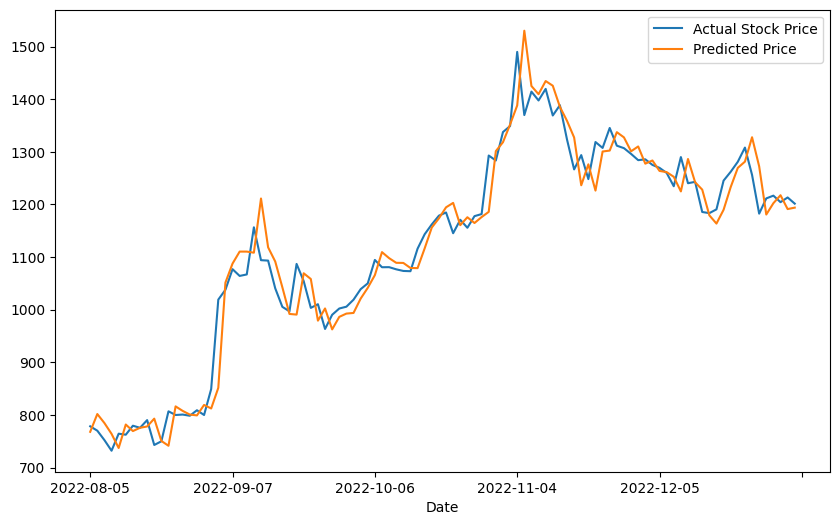

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

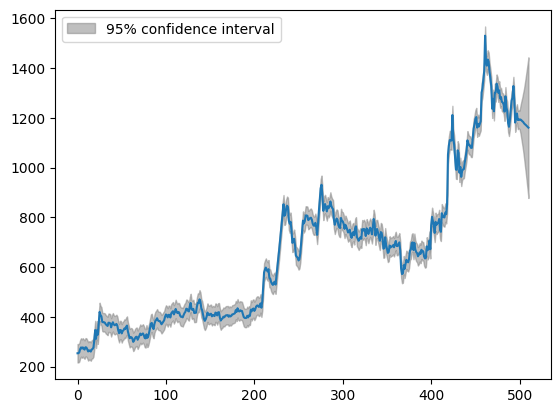

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

44.12337141069113

In [ ]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.9479029587391049

# Predicting Future 10 values:

In [ ]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([1193.93417844, 1191.67722541, 1193.04983699, 1190.30154742,
       1186.28938327, 1183.50740198, 1178.14092395, 1174.17724753,
       1171.25330517, 1167.73280056, 1164.01977058, 1160.30920633,
       1156.36751138, 1152.73872755, 1149.17139046, 1145.51644123,
       1141.81501428, 1138.1095148 , 1134.39697235, 1130.73813726,
       1127.07354266, 1123.39511287, 1119.70684234, 1116.02086298,
       1112.33755477, 1108.66208266, 1104.98320757, 1101.30215263,
       1097.61946095, 1093.93801046, 1090.25730305])

In [ ]:
import datetime
start_date = datetime.datetime(2022,12,30)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [ ]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-30    1193.934178
2022-12-31    1191.677225
2023-01-01    1193.049837
2023-01-02    1190.301547
2023-01-03    1186.289383
2023-01-04    1183.507402
2023-01-05    1178.140924
2023-01-06    1174.177248
2023-01-07    1171.253305
2023-01-08    1167.732801
2023-01-09    1164.019771
2023-01-10    1160.309206
2023-01-11    1156.367511
2023-01-12    1152.738728
2023-01-13    1149.171390
2023-01-14    1145.516441
2023-01-15    1141.815014
2023-01-16    1138.109515
2023-01-17    1134.396972
2023-01-18    1130.738137
2023-01-19    1127.073543
2023-01-20    1123.395113
2023-01-21    1119.706842
2023-01-22    1116.020863
2023-01-23    1112.337555
2023-01-24    1108.662083
2023-01-25    1104.983208
2023-01-26    1101.302153
2023-01-27    1097.619461
2023-01-28    1093.938010
2023-01-29    1090.257303
dtype: float64